In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

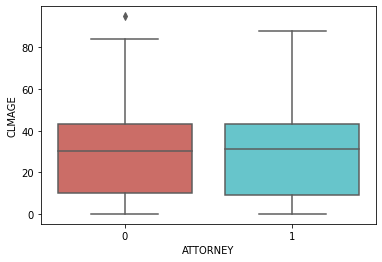

In [2]:
# loading claimants data 

claimants = pd.read_csv("claimants.csv")
claimants.head(10)
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")
claimants.isnull().sum()

In [3]:
claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [4]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)

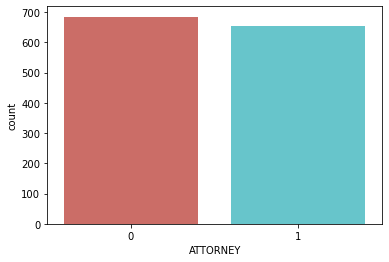

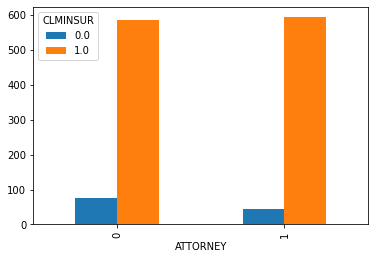

In [5]:
# Getting the barplot for the categorical columns 

sb.countplot(x="ATTORNEY",data=claimants,palette="hls")
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

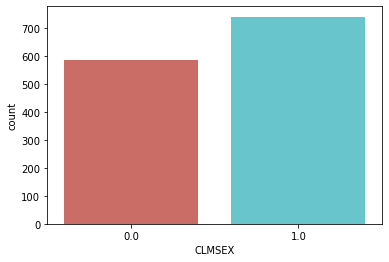

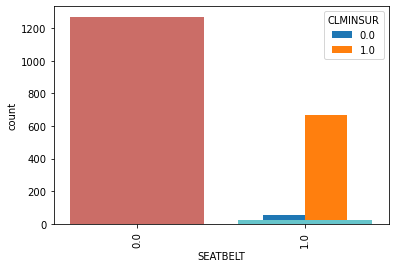

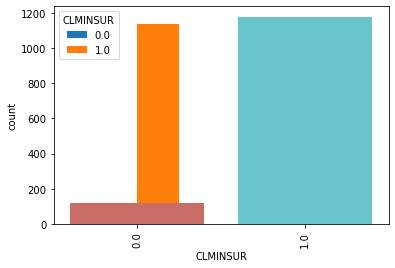

In [6]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

sb.countplot(x="CLMINSUR",data=claimants,palette="hls")

In [8]:
print(claimants.isnull().sum())
claimants.shape # 1340 6 => Before dropping null values

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64


(1340, 6)

In [9]:
claimants.dropna().shape # 1096 6 => After dropping null values

(1096, 6)

In [10]:
# Fill nan values with mode of the categorical column 

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1

claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1


In [12]:
print(claimants.isnull().sum())

#filling CLMAGE with mean
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4


ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64


In [13]:
# Model building 
from sklearn.linear_model import LogisticRegression

claimants.shape

(1340, 6)

In [14]:
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[9.99974219e-01, 2.57808240e-05],
       [4.94202228e-01, 5.05797772e-01],
       [4.24737576e-01, 5.75262424e-01],
       ...,
       [2.85436331e-01, 7.14563669e-01],
       [6.85685529e-01, 3.14314471e-01],
       [3.38841622e-01, 6.61158378e-01]])

In [15]:
y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
type(y_pred)
accuracy = sum(Y==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,Y)

[[435 250]
 [147 508]]


ATTORNEY,0,1
row_0,,
0,435,147
1,250,508
